Nama : Rika Ajeng Finatih

NIM : 121450036

Kelas : Pengantar Pola RA

# Histogram of Oriented Gradients (HOG)

Histogram of Oriented Gradients (HOG) sering digunakan dalam pengolah citra dan detektor benda untuk Computer Vision. Metode ini sering diterapkan dalam pengenalan objek, terutama dalam mendeteksi wajah dan pedestrian (pejalan kaki).

Histogram of Oriented Gradients (HOG) adalah deskriptor visual aktif untuk merepresentasi objek dalam citra. Histogram of Oriented Gradients (HOG) menerapkan distribusi dari gradien oriantasi di masing-masing sel pada gambar. Sedangkan, Support Vector Machine (SVM) merupakan algoritma pembelajaran mesin yang biasa digunakan dalam klasifikasi dan regresi. SVM mengeluarkan hyperplane optimal yang memisahkan data dari kelas ke kelas yang berbeda.

HOG sering diimplementasikan menggunakan pustaka seperti Open CV dan scikit-image dalam python. Berikut merupakan implementasi HOG dalam python menggunakan scikit-image:

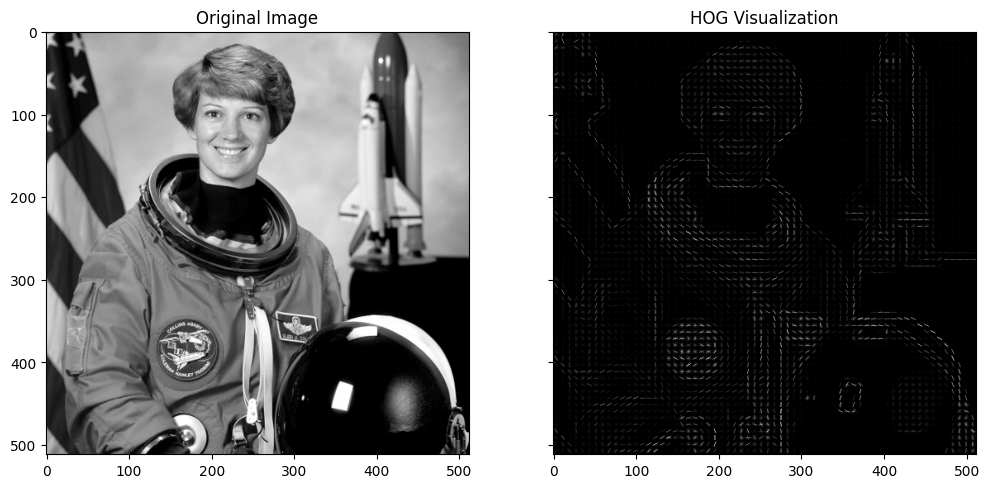

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.50      0.73      0.60     14294
           1       0.51      0.28      0.36     14283

    accuracy                           0.50     28577
   macro avg       0.50      0.50      0.48     28577
weighted avg       0.50      0.50      0.48     28577



In [50]:
# Import library
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Membuat dan menampilkan gambar
image = astronaut()
gray_image = rgb2gray(image)

# Step 2: Extraksi fitur HOG dan visualisasi
fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

# Mengubah skala gambar HOG untuk visualisasi yang lebih baik
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Menampilkan gambar asli dan visualisasi HOG
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(hog_image_rescaled, cmap='gray')
ax[1].set_title('HOG Visualization')
plt.show()

# Step 3: Mempersiapkan data untuk SVM
# Membuat label sintetis sebagai contoh
labels = np.random.randint(2, size=fd.shape[0])  # Random binary acak

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(fd.reshape(-1, 1), labels, test_size=0.2, random_state=42)

# Step 4: Melatih model SVM dengan fitur HOG
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Step 5: Prediksi dan Evaluasi
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

**Analisis Hasil:**

Hasil evaluasi model yang menggunakan Histogram of Oriented Gradients (HOG) dan Support Vector Machine (SVM) menunjukkan kinerja yang cukup rendah, dengan akurasi total sebesar 50%. Ini menunjukkan bahwa model tidak lebih baik dari tebakan acak. Precision untuk kelas 0 adalah 0.50 dan recall-nya sangat tinggi pada 0.73, menunjukkan kemampuan model yang baik dalam mengidentifikasi kelas 0. Namun, precision untuk kelas 1 juga 0.51, sementara recall-nya sangat rendah pada 0.26, mengindikasikan bahwa model hanya berhasil mendeteksi 26% dari sampel kelas 1 yang ada. F1-score untuk kelas 0 adalah 0.60, sedangkan untuk kelas 1 hanya 0.36, menunjukkan performa yang buruk dalam mendeteksi kelas 1. Rata-rata makro dan tertimbang dari precision, recall, dan F1-score semuanya berada di sekitar 0.50 dan 0.48, menegaskan bahwa model secara keseluruhan tidak efektif, terutama dalam mendeteksi kelas minoritas. Model ini menunjukkan ketidakseimbangan dalam performa dan mungkin memerlukan penyesuaian parameter, teknik penyeimbangan kelas, atau metode lain untuk meningkatkan deteksi kelas 1.